# Midterm #2

**Read the following.** It contains important information about this exam.
 - You must submit your solutions to Canvas **by 4:00 pm!** Please plan accordingly. This gives you approximately 1.5 hours for this exam.
 - There is both a written and computational part to this exam. You will need to download both from Canvas, and submit solutions for both to Canvas.
 - You are allowed to use any reference materials you like for this exam, except each other.
 - You should make an effort to answer all questions on this exam. Clearly identify your final answers, and clearly explain your solutions. This will be graded according to the syllabus rubric, so effort will be heavily weighted.


## Initialization

Collect all your initialization here.

In [1]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integ
import scipy.special as sf
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
### END SOLUTION

## Potential of a Line Charge

In introductory physics we learn that the electric potential a distance $z$ above a line of charge with linear charge density $\lambda(x)$ is given by

$$ \Phi (z) = \frac{1}{4\pi\epsilon_0} \int_{-\infty}^{\infty} \mathrm{d}x \frac{\lambda(x)}{\sqrt{x^2+z^2}}. $$

In this problem we will consider a linear charge density

$$ \lambda(x) = \frac{q}{a} \mathrm{e}^{-x^2/a^2} , $$

where we choose $q/(4\pi\epsilon_0) = 1\mathrm{V\cdot m}$ and $a = 1.89\,\mathrm{m}$.

Produce a figure of $\Phi(z)$ for $z\in[0.1,5]\,\mathrm{m}$.

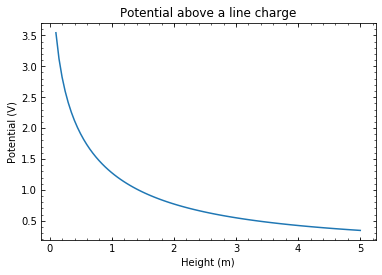

In [5]:
### BEGIN SOLUTION
def integrand(x, a, z) :
    """
    Integrand to determine the potential for the linear charge density documented in the problem.
    x : Distance along the line of charge (m).
    a : Scale length for the linear charge density (m).
    z : Distance from the line of charge (m).
    """
    return (1/a) * np.exp(-x**2/a**2) / np.sqrt(x**2+z**2)

a = 1.89
z = np.linspace(0.1, 5, 100)
Phi = np.zeros_like(z)
for j in range(len(z)) :
    Phi[j] = integ.quad(integrand, -np.inf, np.inf, args=(a, z[j]))[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, Phi)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Potential (V)')
ax.set_title('Potential above a line charge');
### END SOLUTION

It turns out that this integral can be performed analytically, the result being

$$ \Phi(z) = \left( \frac{q}{4\pi\epsilon_0 a} \right) \mathrm{e}^{y^2} K_0(y^2), $$

where $y\equiv z/(\sqrt{2}a)$ and $K_0(x)$ is yet another special function known as the zeroth order modified Bessel of the second kind. Not surprisingly, this function is defined in scipy.special with an obvious name.

Calculate and plot the fractional error in the integral you calculated above.

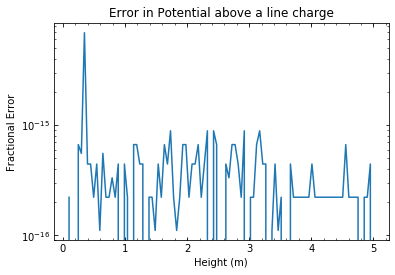

In [6]:
### BEGIN SOLUTION
y = z / (np.sqrt(2)*a)
Phitrue = (1/a) * np.exp(y**2) * sf.k0(y**2)
err = np.abs(1 - Phi/Phitrue)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(z, err)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Fractional Error')
ax.set_title('Error in Potential above a line charge');
### END SOLUTION

## Lane-Emden Equation

**Note:** you should complete the written problem 1 before working on this problem.

The Lane-Emden equation describes a self-gravitating, spherically symmetric, polytropic fluid.  It is often used as a (rather) simple model of a star.  A polytropic fluid is one that satisfies the polytropic equation of state, $P \propto \rho^{1+1/n}$, where $P$ is the pressure, $\rho$ is the density, and $n$ is called the polytropic index.  Written in dimensionless form the Lane-Emden equation becomes the second order differential equation:

$$ \frac1{\xi^2} \frac{\mathrm{d}}{\mathrm{d}\xi} \left( \xi^2 \frac{\mathrm{d}}{\mathrm{d}\xi} \theta(\xi) \right) + \theta(\xi)^n = 0. $$

Here $\xi$ is a dimensionless radius and the function $\theta(\xi)$ is related to the density (and so is also related to the pressure) in the fluid.  You can see <a href="http://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation">Wikipedia</a> for a brief discussion and derivation.  For our purposes, this is just a differential equation we can solve numerically.

Solve the Lane-Emden equation for $n=0$ and $n=2$ using `solv_ivp` and the initial conditions $\theta(0)=1$ and $\frac{\mathrm{d}\theta}{\mathrm{d}\xi}(0)=0$.
Note that this system of equations has a coordinate singularity at $\xi =0$. There are several ways we can work around this. Here, we can just begin integrating at a small, non-zero value of $\xi$, e.g. $\xi = 10^{-8}$.
Integrate to a large enough $\xi$ so that $\theta$ becomes negative.

*Hint: For the $n=0$ polytrope, solve_ivp may take a very large step, and the resulting solution will not be sampled well enough to produce a nice figure. To improve this, you can specify a maximum step size, e.g. specify `max_step = 0.01` when using `solve_ivp`.*

Text(0.5,1,'Lane-Emden Equation Solutions')

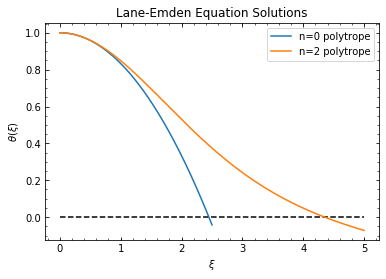

In [10]:
### BEGIN SOLUTION
def lane_emden(xi, y, n) :
    """ Lane-Emden equation.  Choose
    y[0] : theta
    y[1] : phi = dtheta/dxi
    """
    dydxi = np.zeros_like(y)
    dydxi[0] = y[1]
    dydxi[1] = -2*y[1]/xi - y[0]**n
    return dydxi

y0 = np.array([1, 0])
res0 = integ.solve_ivp(lambda xi, y: lane_emden(xi, y, 0), (1.0e-8, 2.5), y0, max_step=0.01 )
res2 = integ.solve_ivp(lambda xi, y: lane_emden(xi, y, 2), (1.0e-8, 5), y0, max_step=0.01 )
plt.plot(res0.t, res0.y[0], label="n=0 polytrope")
plt.plot(res2.t, res2.y[0], label="n=2 polytrope")
plt.hlines(0, 0, 5, linestyles='dashed')
plt.legend()
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title('Lane-Emden Equation Solutions')
### END SOLUTION

**Note:** you should complete the written problem 1 before working on this problem.

In problem 1 of the written portion, you should have determined an analytic solution for the $n=0$ polytrope. Plot the fractional error in the numerical solution obtained from `solve_ivp`.

Text(0.5,1,'Lane-Emden Fractional Error for $n=0$')

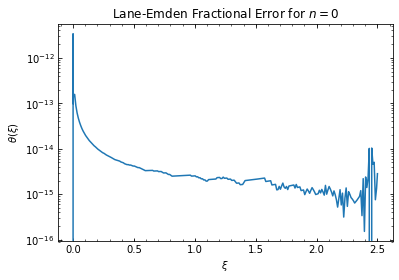

In [81]:
### BEGIN SOLUTION
plt.semilogy(res0.t, np.abs((res0.y[0] - (1-res0.t**2/6.))/res0.y[0]) )
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title('Lane-Emden Fractional Error for $n=0$')
### END SOLUTION

## Turn in the Exam

Turn in the exam on Canvas following the procedure used for the labs and homework.